In [2]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

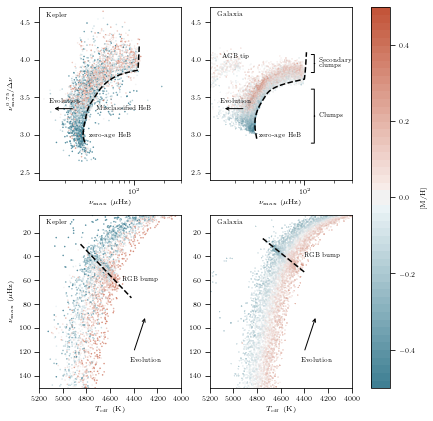

In [50]:
def points_to_line(p1, p2, x):
    k = (p1[1]-p2[1])/(p1[0]-p2[0])
    b = p2[1] - k*p2[0]
    y = k*x + b
    return y

fig, axes = plt.subplots(figsize=mnras_size(column='double', square=True), nrows=2, ncols=2, squeeze=False)

ax1, ax2, ax3, ax4 = axes.reshape(-1)

# HeB stars

yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/yu/nike_edge_samples.npy')

pdv = np.load(work_path+'sample/heb/padova/padova.npy',allow_pickle=True).tolist()
edge_pdv = np.load(work_path+'sample/heb/padova/nike_edge_samples.npy')



# Kepler stars
c = ax1.scatter(yu['numax'], yu['nike'], c=yu['feh'], label="Kepler",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=1, rasterized=True)
# Galaxia stars
c = ax2.scatter(pdv['numax'], pdv['nike'], c=pdv['feh'], label="Galaxia",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=0.01, rasterized=True)

# edge
ax1.plot(edge[:-3000,0], edge[:-3000,1], color=black, linestyle='--',ms=1, rasterized=True)
ax2.plot(edge_pdv[:-1000,0], edge_pdv[:-1000,1], color=black, linestyle='--',ms=1, rasterized=True)


# annotations
# ax1.annotate('Secondary clumps', xy=(130, 4.05), xytext=(145, 4.05), ha='left', va='center',
# #             bbox=dict(boxstyle='square', fc='white'),
#             arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.5', lw=1.0))
# ax1.annotate('Clumps', xy=(130, 3.35), xytext=(145, 3.35), ha='left', va='center',
# #             bbox=dict(boxstyle='square', fc='white'),
#             arrowprops=dict(arrowstyle='-[, widthB=5.0, lengthB=0.5', lw=1.0))
ax2.annotate('Secondary\n clumps', xy=(126, 3.95), xytext=(140, 3.95), ha='left', va='center',
#             bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.5', lw=1.0), fontsize=6)
ax2.annotate('Clumps', xy=(126, 3.25), xytext=(140, 3.25), ha='left', va='center',
#             bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=4.5, lengthB=0.5', lw=1.0), fontsize=6)
# # annotations
ax1.text(35, 3.0, "zero-age HeB", va="center", ha="left", fontsize=6)
ax2.text(35, 3.0, "zero-age HeB", va="center", ha="left", fontsize=6)


# AGB stars
ax1.text(80, 3.3, 'Misclassified HeB', ha='center', va='bottom', fontsize=6)
ax2.text(20, 4.0, 'AGB tip', ha='center', va='bottom', fontsize=6)


# colorbar
# cax = fig.add_axes([0.15, .87, 0.35, 0.03]) # left, bottom, width, height
# cax = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
plt.colorbar(c, ax=axes, orientation="vertical").set_label("[M/H]")

for iax, ax in enumerate([ax1, ax2]):
    ax.axis([11, 300, 2.4, 4.7])
    ax.set_xscale("log")
    ax.set_xlabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
    if iax == 0:
        ax.set_ylabel("$\\nu_{\\rm max}^{0.75}/\\Delta\\nu$")
    # evolution arrow
    ax.annotate('', xy=(15, 3.35), xytext=(25, 3.35),
                arrowprops=dict(arrowstyle='->', lw=1.0))
    ax.text(20, 3.4, 'Evolution', ha='center', va='bottom', fontsize=6)

ax1.text(0.05, 0.95, "Kepler", transform=ax1.transAxes, va="center", ha="left", fontsize=6)
ax2.text(0.05, 0.95, "Galaxia", transform=ax2.transAxes, va="center", ha="left", fontsize=6)




# RGB stars

yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
yu_bump = np.load(work_path+'sample/rgb/yu/numax_bump.npy')

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
pdv_bump = np.load(work_path+'sample/rgb/mist/numax_bump.npy')



# Kepler stars
c = ax3.scatter(yu['teff'], yu['numax'], c=yu['feh'], label="Kepler",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=1, rasterized=True)
# Galaxia stars
c = ax4.scatter(pdv['teff'], pdv['numax'], c=pdv['feh'], label="Galaxia",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=0.01, rasterized=True)

# bump

xbump = np.linspace(4850, 4420, 100)
ybump = yu_bump[0]*xbump+yu_bump[1]
ax3.plot(xbump, ybump, color=black, linestyle='--',ms=1, rasterized=True)
xbump = np.linspace(4750, 4400, 100)
ybump = pdv_bump[0]*xbump+pdv_bump[1]
ax4.plot(xbump, ybump, color=black, linestyle='--',ms=1, rasterized=True)


# # annotations
ax3.text(4500, 60.0, "RGB bump", va="center", ha="left", fontsize=6)
ax4.text(4400, 40.0, "RGB bump", va="center", ha="left", fontsize=6)


for iax, ax in enumerate([ax3, ax4]):
    ax.axis([5200, 4000, 150, 5])
    # ax.set_yscale("log")
    ax.set_xlabel("$T_{\\rm eff}$ (K)")
    if iax == 0:
        ax.set_ylabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
    # evolution arrow
    ax.annotate('', xy=(4300, 90), xytext=(4400, 120),
               arrowprops=dict(arrowstyle='->', lw=1.0))
    ax.text(4300, 130, 'Evolution', ha='center', va='bottom', fontsize=6)

ax3.text(0.05, 0.95, "Kepler", transform=ax3.transAxes, va="center", ha="left", fontsize=6)
ax4.text(0.05, 0.95, "Galaxia", transform=ax4.transAxes, va="center", ha="left", fontsize=6)


# plt.subplots_adjust(hspace=0)
# plt.tight_layout()


# plt.show()
plt.savefig(overleaf_path+'nike.pdf')


# Count the number of stars

In [4]:
yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
print('yu18, HeB, ', len(yu['mass']))
apk = np.load(work_path+'sample/heb/yu/apk18.npy',allow_pickle=True).tolist()
print('apk18, HeB, ', len(apk['mass']))

yu = np.load(work_path+'sample/rgb/yu/yu18.npy',allow_pickle=True).tolist()
print('yu18, RGB, ', len(yu['mass']))
apk = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
print('apk18, RGB, ', len(apk['mass']))


yu18, HeB,  7547
apk18, HeB,  2531
yu18, RGB,  7534
apk18, RGB,  3308
